In [1]:
%pylab inline
%run ../utils.py

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = get_data()

In [4]:
from matplotlib.colors import LogNorm
import seaborn as s
s.set(rc={'image.cmap': "jet"})
config_plots(rcParams)

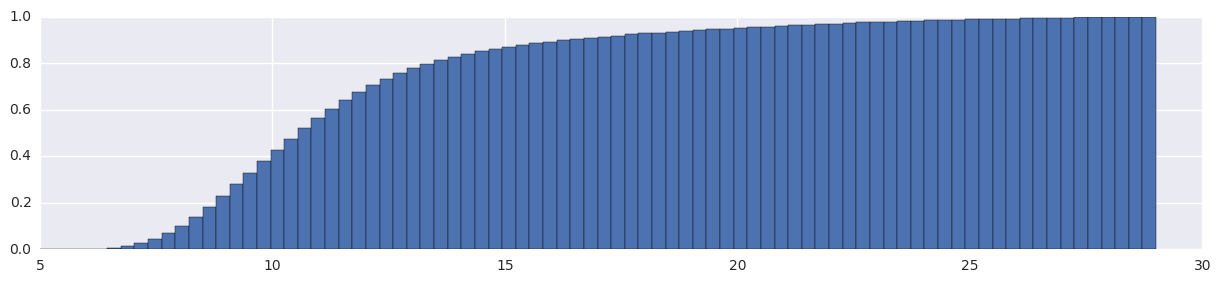

In [5]:
figsize(15,3)
data['Rcutoff'][data['Rcutoff']>0].hist(bins=np.linspace(0,29,100), cumulative=True, normed=True)

In [6]:
def dplot(name):
    args={"bins":np.linspace(0,10,100), "ax":gca(), "histtype":"step", "lw":2}
    data[name + '_P'][data[name + '_P']<10].hist(label='Protons',  color='r', **args)
    data[name + '_D'][data[name + '_D']<10].hist(label='Deuterons',color='b', **args)
    legend()
    xlabel(name)

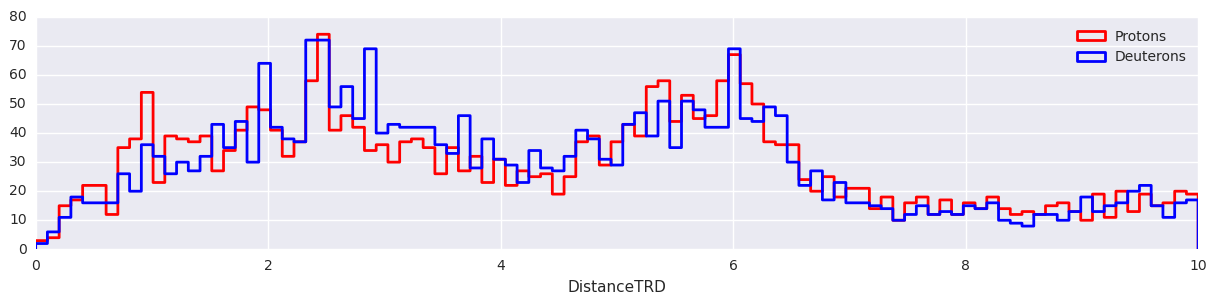

In [7]:
dplot('DistanceTRD')

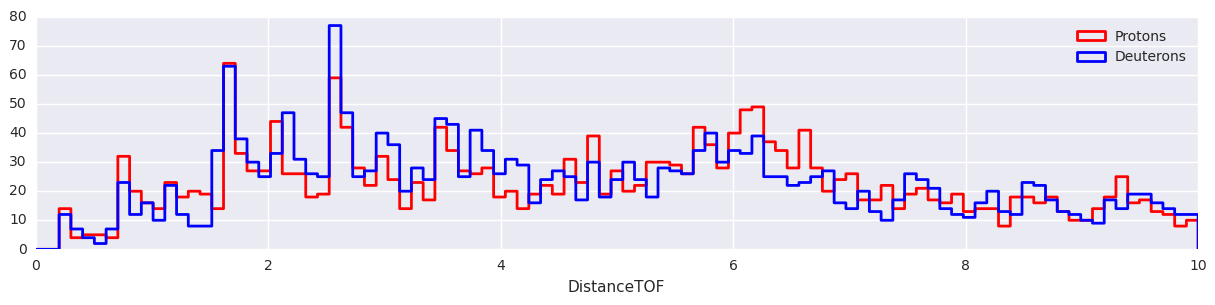

In [8]:
dplot('DistanceTOF')

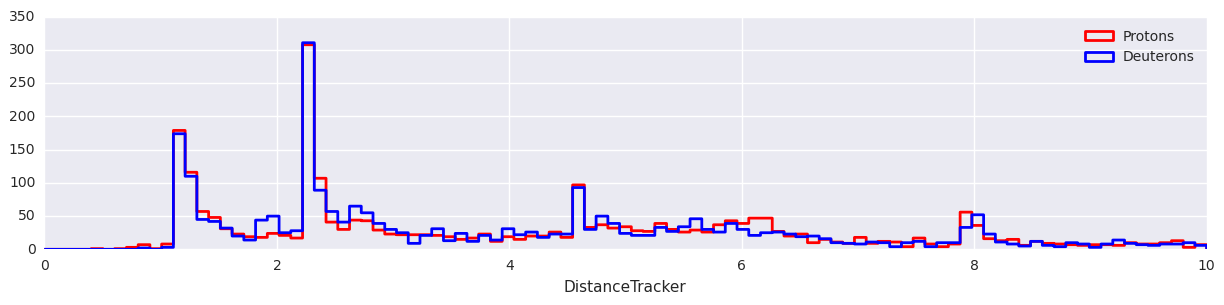

In [9]:
dplot('DistanceTracker')

(0.4, 1)

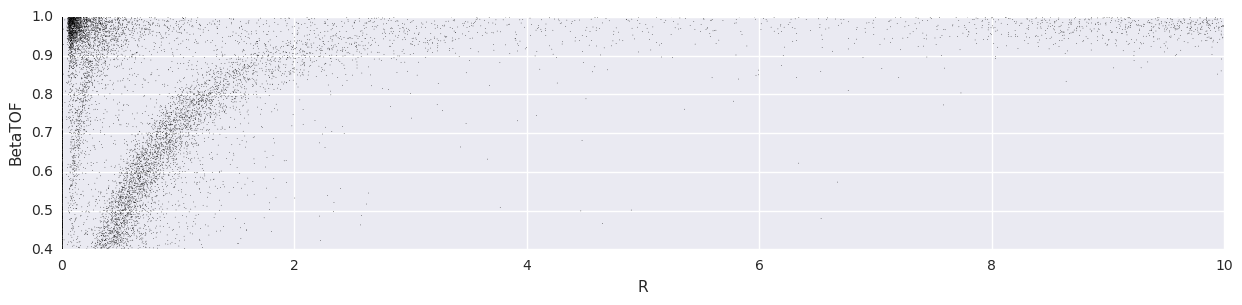

In [10]:
data.plot(x="R", y="BetaTOF", kind="scatter", c='k', marker='.', lw=0, s=1)
xlim(0,10); ylim(0.4,1)

(0.4, 1)

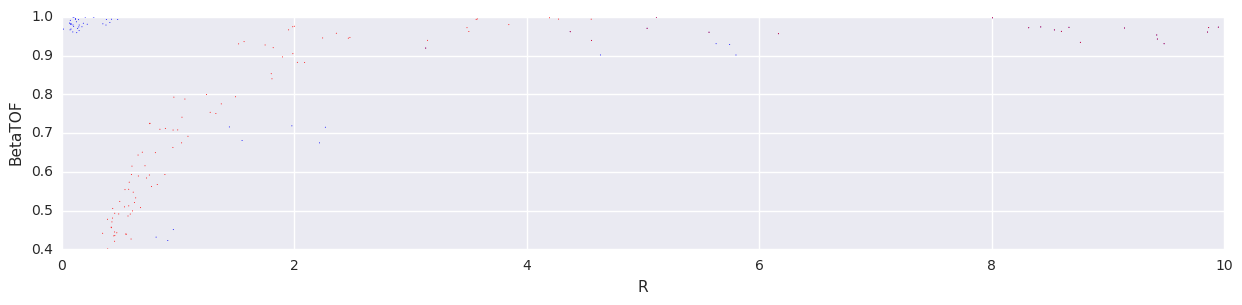

In [10]:
data[data['DistanceTOF_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTOF_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

(0.4, 1)

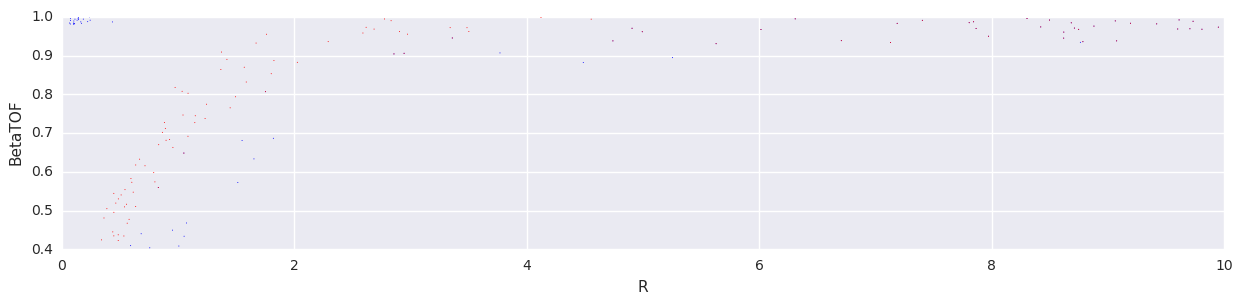

In [11]:
data[data['DistanceTracker_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTracker_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

(0.4, 1)

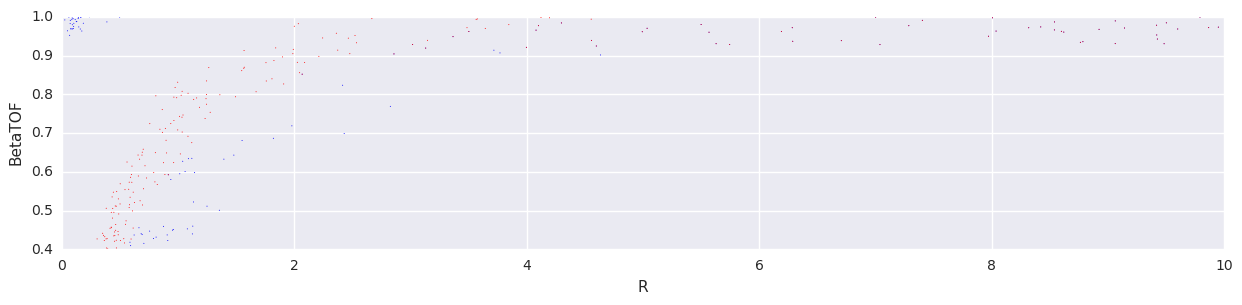

In [12]:
data[data['DistanceTRD_D']<2].plot(x="R", y="BetaTOF", kind="scatter", c='b', marker='.', lw=0, s=2, ax=gca())
data[data['DistanceTRD_P']<2].plot(x="R", y="BetaTOF", kind="scatter", c='r', marker='.', lw=0, s=2, ax=gca())
xlim(0,10); ylim(0.4,1)

In [14]:
%run Functions.py

In [15]:
data['DistanceTRD_D'].describe()

count     100000.000000
mean      955580.450643
std       206025.306275
min            0.037841
25%      1000000.000000
50%      1000000.000000
75%      1000000.000000
max      1000000.000000
Name: DistanceTRD_D, dtype: float64

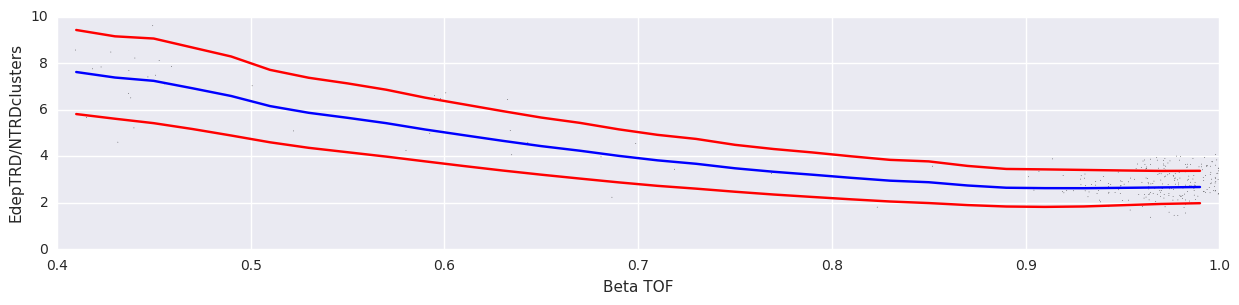

In [16]:
d = data[data['DistanceTRD_D']<2]
scatter(d['BetaTOF'], d['EdepTRD']/d['NTRDclusters'], c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETRD,'b')
plot(Beta_cent,ETRD+sigmaETRDinv*(ETRD**2),'r')
plot(Beta_cent,ETRD-sigmaETRDinv*(ETRD**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("EdepTRD/NTRDclusters")

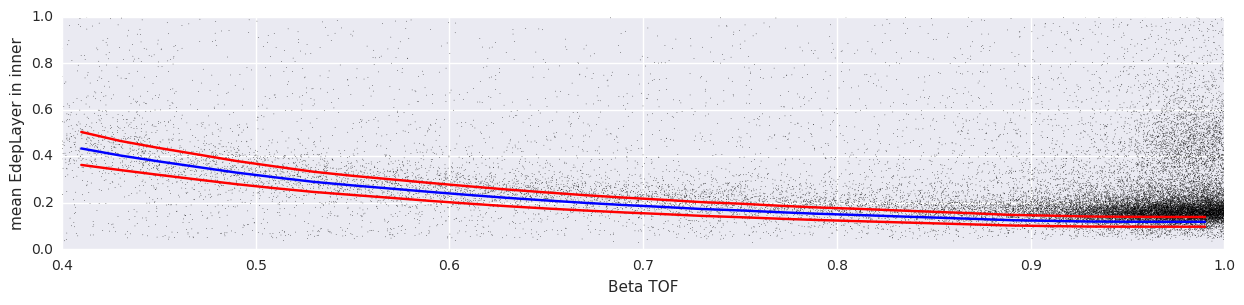

In [23]:
sel = lambda s: [ c for c in data.columns 
    if c.startswith(s) and c[-1] not in ["0"] ]
d = data#[data['DistanceTracker_P']<3]
etrack = d[sel("EDepLayer")].sum(axis=1)/14
scatter(d['BetaTOF'], etrack, c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETrack,'b')
plot(Beta_cent,ETrack+sigmaEtrackinv*(ETrack**2),'r')
plot(Beta_cent,ETrack-sigmaEtrackinv*(ETrack**2),'r')
xlim(0.4,1.0); ylim(0,1)
xlabel("Beta TOF"); ylabel("mean EdepLayer in inner")

In [24]:
d[sel("EDepLayer")]

,EDepLayerX_1,EDepLayerX_2,EDepLayerX_3,EDepLayerX_4,EDepLayerX_5,EDepLayerX_6,EDepLayerX_7,EDepLayerX_8,EDepLayerY_1,EDepLayerY_2,EDepLayerY_3,EDepLayerY_4,EDepLayerY_5,EDepLayerY_6,EDepLayerY_7,EDepLayerY_8
0,0.163315,0.098119,0.028855,0.034613,0.000000,0.574974,0.347961,16.093045,0.182489,0.000000,0.055050,0.000000,0.065176,0.551300,0.459391,28.721000
1,0.207142,0.123752,0.125021,0.103572,0.109983,0.130898,0.099810,0.084320,0.308213,0.116052,0.108589,0.118656,0.122567,0.091593,0.127594,0.025095
2,0.034181,0.059086,0.000000,0.000000,0.026901,0.074688,0.000000,0.109821,0.114405,0.034473,0.024584,0.055601,0.058128,0.028204,0.029693,0.053758
3,0.131061,0.056376,0.033859,0.027173,0.059331,1.325530,0.944982,4.221037,0.131757,0.000000,0.077132,0.000000,0.000000,1.570864,1.139446,4.391335
4,0.164677,0.000000,0.000000,0.000000,0.117601,0.000000,0.000000,0.158210,0.062094,0.000000,0.000000,0.077268,0.000000,0.000000,0.000000,0.463343
5,0.509545,0.027539,0.237885,1.840807,1.594479,3.639455,2.399506,7.257090,1.947599,0.381200,0.305834,1.939455,1.653535,2.708674,2.368721,6.817674
6,0.497073,0.400533,0.267169,0.569176,0.149600,0.474152,0.413517,7.791520,0.573386,0.425359,0.218758,0.599163,2.173352,0.447232,0.434575,6.659423
7,0.152957,0.075386,0.420302,0.096728,0.102516,0.147171,0.117260,0.116438,0.133316,0.217182,0.446237,0.084677,0.259396,0.101609,0.131118,0.055525
8,0.283483,0.146760,0.187738,0.285788,0.000000,0.000000,0.000000,0.114474,0.300434,0.193382,0.036745,0.347478,0.081616,0.000000,0.098311,0.106245
9,0.026559,0.095954,0.029655,0.189136,0.044594,0.051481,0.000000,1.436449,0.159063,0.109673,0.030351,0.361587,0.000000,0.096759,0.028678,1.127532


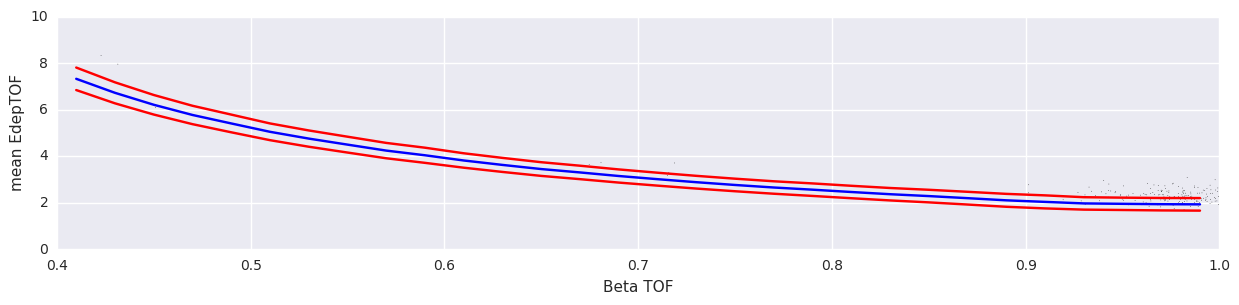

In [18]:
sel = lambda s: [ c for c in data.columns if c.startswith(s) ]
d = data[data['DistanceTOF_D']<2]
scatter(d['BetaTOF'], d[sel('EdepTOF')].mean(axis=1), c='k', s=1, marker='.', lw=0)
plot(Beta_cent,ETOF,'b')
plot(Beta_cent,ETOF+sigmaEtofinv*(ETOF**2),'r')
plot(Beta_cent,ETOF-sigmaEtofinv*(ETOF**2),'r')
xlim(0.4,1.0); ylim(0,10)
xlabel("Beta TOF"); ylabel("mean EdepTOF")